In [2]:
import numpy as np
from matplotlib import pyplot as plt
from pyciss.ringcube import RingCube

/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pysis/cubefile.py:113: RuntimeWarning: invalid value encountered in less
  data[data < self.specials['Min']] = numpy.NINF
/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pysis/cubefile.py:114: RuntimeWarning: invalid value encountered in greater
  data[data > self.specials['Max']] = numpy.inf


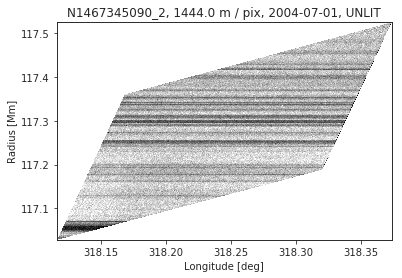

In [3]:
#Raw Plots for my reference:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~
#test1 = RingCube('N1597806864')
#test1 = RingCube('N1467345680')
#test1.imshow()  #Gives the default plot with axes labels and all
#RingCube('N1467344745').meta_litstatus
RingCube('N1467345090').imshow()
#test1??
#test1??
#~~~~~~
#make_profile_plot('N1467344745')  #soliton
#make_profile_plot('N1467345680')  #soliton
#make_profile_plot('N1467351049')  #both sides drop
#make_profile_plot('N1560312042')  #good
#make_profile_plot('N1584974162')  #OG
#make_profile_plot('N1595337686')  #low left side
#make_profile_plot('N1595338491')  #good?
#make_profile_plot('N1597806864')  #left up, big gap, right drop
#make_profile_plot('N1625958972')  #mid gap
#make_profile_plot('N1654249612')  #mid gap, right drop
#make_profile_plot('N1868840683')  #left gap #DONT
#make_profile_plot('N1595338008')  #both     #DONT


In [4]:
#np.lookfor('zfill')
#np.chararray??
#xtest=np.array([3])
#xtest.zfill(4)

TypeError: 'NoneType' object is not iterable

In [5]:
from glob import glob

rawDir = glob("./db/N*")  #This leaves out the one directory with W*
rawDir = np.array(rawDir)

#for i in np.arange(0,rawDir.size):
#    rawDir[i] = rawDir[i][22:]

print(rawDir)

['./db/N1654249612' './db/N1595337686' './db/N1601009710'
 './db/N1595338491' './db/N1625958972' './db/N1467346565'
 './db/N1467345444' './db/N1628682165' './db/N1467345149'
 './db/N1597806864' './db/N1467345562' './db/N1560312042'
 './db/N1467345090' './db/N1628682038' './db/N1467345739'
 './db/N1467345680' './db/N1628679668' './db/N1467344745'
 './db/N1467346624' './db/N1584974162' './db/N1467346329'
 './db/N1874683898' './db/N1467345975' './db/N1868840683'
 './db/N1628684875' './db/N1467351049' './db/N1467345916'
 './db/N1595338008' './db/N1467346388' './db/N1467345385']


In [33]:

#~~~~~~~~~~
import csv
n_files = np.array(['N1601009710','N1467346565','N1467345444','N1628682165','N1467345149','N1467345562','N1467345090','N1628682038','N1467345739','N1467345680','N1628679668','N1467344745','N1467346624','N1467346329','N1874683898','N1467345975','N1628684875','N1467345916','N1467346388','N1467345385'])

with open('./Ring_Group_Beta_2/manifest.csv','w') as file:
    for i in np.arange(n_files.size):
        file.write(f"Z{str(i).zfill(4)}" + ',' + f"Z{str(i).zfill(4)}" +'_'+ n_files[i] + '_img.png,' + f"Z{str(i).zfill(4)}" +'_'+ n_files[i] + '_plt.png,' + RingCube(n_files[i]).meta_litstatus)
        file.write('\n')
        make_ring_image(n_files[i], save=True, show=False, directory='Ring_Group_Beta_2', pref=f"Z{str(i).zfill(4)}", suf='_img')
        make_profile_plot(n_files[i], save=True, show=False, directory='Ring_Group_Beta_2', pref=f"Z{str(i).zfill(4)}", suf='_plt')

In [3]:

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import pandas as pd
n_files = np.array(['N1467344745','N1467345680','N1467351049','N1560312042','N1584974162','N1595337686','N1595338491','N1597806864','N1625958972','N1654249612'])

#before big loop:
bucket = []

# now loop over all N_ids:
# produce the images
# at the end, do this for every zooniverse subject, to create the manifest later:
index = 0
d = {}
for i in n_files:
    cube = RingCube(i)
    z_id = str(index)
    d['z_id'] = f"{zid.zfill(4)}"
    d['img_name'] = f"{i}_img.png"
    d['plt_name'] = f"{i}_plt.png"
    d['lit_status'] = cube.meta_litstatus
    index = index + 1
#d
#print(n_files)
#dT = {}
#cubeT = RingCube('N1467345680')
#z_id = str(index)
#d = {}
#d['z_id'] = f"{zid.zfill(4)}"
#dT['img_name'] = f"{'N1467345680'}_img.png"
#dT['plt_name'] = f"{'N1467345680'}_plt.png"
#dT['lit_status'] = cubeT.meta_litstatus

#print(dT)
# after big loop:

#manifest = pd.DataFrame(bucket)
#manifest

#manifest.to_csv('manifest.csv’)

NameError: name 'RingCube' is not defined

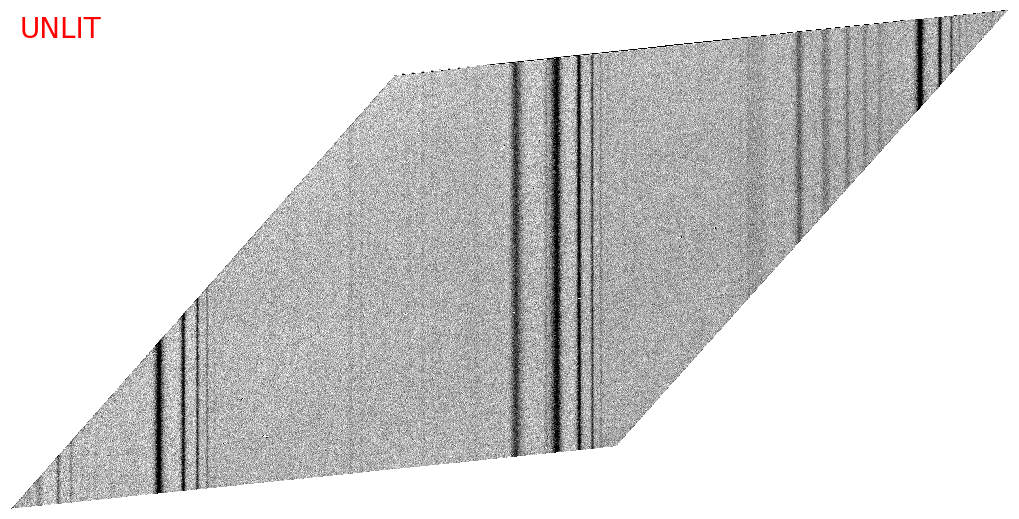

In [17]:
#Function for image saving (for citizens)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def make_ring_image(filename, save=True, show=True, directory='..', pref='', suf='_img'):
    #Setting up the data arrays and useful values
    cube = RingCube(filename)
    data = cube.img
    extent_val = cube.extent
    min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))
    minlon = cube.minlon.value
    maxlon = cube.maxlon.value
    minrad = cube.minrad.value
    maxrad = cube.maxrad.value
    
    #Setting up the figure for plotting
    fig = plt.figure(dpi=100, frameon=False)
    ax = plt.axes([0,0,1,1])
    #Fixed figure resolution with 100 dpi: (wxh) = (1000x500 pixels)
    fig.set_size_inches(10., 5.)
    #Removing axis and labels
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('off')
    #Plotting the data array transposed to rotate the image
    plt.imshow(data.T,extent=extent_val,cmap='gray',vmin=min_,vmax=max_,interpolation='none',origin='lower',aspect='auto')
    #Insert 'LIT' or 'UNLIT' text in top left corner
    plt.text(0.01,0.96,cube.meta_litstatus,color='red',fontsize=20,ha='left',va='center',transform=ax.transAxes)
    #Setting these strict x/y limits are necessary for removing white space in the png file
    plt.ylim([minrad,maxrad])
    plt.xlim([minlon,maxlon])
    #If you want to save the file: Please modify the first part of the string to determine its destination
    if save == True:
        plt.savefig('./' + directory + '/' + pref +'_'+ filename + suf + '.png',dpi=100,format='png',bbox_inches='tight',pad_inches=0,frameon=False)
    else:
        pass
    #If you want to display the image in ipython..
    if show == True:
        plt.show()
    else:
        pass
    plt.close()
    return

#for i in n_files:
#    make_ring_image(i,save=False)

#make_ring_image('N1467344745',save=False) #soliton
#make_ring_image('N1467345680',save=False) #soliton
#make_ring_image('N1467351049',save=False)
#make_ring_image('N1560312042',save=False)
#make_ring_image('N1584974162',save=False)
#make_ring_image('N1595337686',save=False)
#make_ring_image('N1595338491',save=False)
#make_ring_image('N1597806864',save=False)
#make_ring_image('N1625958972',save=False)
#make_ring_image('N1654249612',save=False)
#make_ring_image('N1868840683',save=False)#DONT
#make_ring_image('N1595338008',save=False)#DONT
#make_ring_image('N1467345090',save=False, show=True, directory='..', pref='', suf='_img')
make_ring_image('N1467346565',save=False, show=True, directory='..', pref='', suf='_img')

In [23]:
#Used this to cite Michael's plotting scripts
#~~~~
#~~~~
#from pyciss import plotting
#plotting??
#RingCube??

import pandas as pd
def calc_offset(cube):
    """Calculate an offset.

    Calculate offset from the side of data so that at least 200 image pixels are in the MAD stats.

    Parameters
    ==========
    cube : pyciss.ringcube.RingCube
        Cubefile with ring image
    """
    i = 0
    while pd.Series(cube.img[:, i]).count() < 50:
        i += 1
    return max(i, 20)


In [31]:
#Function for plot saving (for citizens)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def make_profile_plot(filename, save=True, show=True, directory='..', pref='', suf='_plt'):
    #Setting up the data arrays and useful values
    cube = RingCube(filename)
    data = cube.img
    minrad = cube.minrad.value
    maxrad = cube.maxrad.value
    
    #Calculating the y-values of the plot (copied from Michael's code)
    ifs = np.nanmedian(data, axis=1)
    ifs = np.nan_to_num(ifs)
    ifs[ifs < 0] = 0
    
    offset = calc_offset(cube)
    
    #Setting up the figure for plotting
    fig = plt.figure(facecolor='white', dpi=100)   #facecolor must = 'white' for the plot to show up in Zooniverse
    ax = plt.axes([0,0,1,1])
    #Fixed figure resolution with 100 dpi: (wxh) = (1000x500 pixels)
    fig.set_size_inches(10., 2.5)
    #Removing axis and labels
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('off')
    #Plotting the intensity profile of the image produced above
    plt.plot(np.linspace(*cube.extent[2:], data.shape[0])[offset:-offset], ifs[offset:-offset], color='black', lw=1)
    #Setting this strict x limit is necessary for removing white space in the png file
    plt.xlim([minrad,maxrad])
    #If you want to save the file: Please modify the first part of the string to determine its destination
    if save == True:
        plt.savefig('./' + directory + '/' + pref +'_'+ filename + suf + '.png',dpi=100,format='png',bbox_inches='tight',pad_inches=0,frameon=False)
    else:
        pass
    #If you want to display the image in ipython..
    if show == True:
        plt.show()
    else:
        pass
    plt.close()
    return

#for i in n_files:
#    make_profile_plot(i,show=False)


#make_profile_plot('N1467344745',save=False)  #soliton
#make_profile_plot('N1467345680')  #soliton
#make_profile_plot('N1467351049')
#make_profile_plot('N1560312042')
#make_profile_plot('N1584974162')
#make_profile_plot('N1595337686')
#make_profile_plot('N1595338491')
#make_profile_plot('N1597806864')
#make_profile_plot('N1625958972')
#make_profile_plot('N1654249612')
#make_profile_plot('N1868840683',save=False)  #DONT
#make_profile_plot('N1595338008',save=False)  #DONT
#make_profile_plot('N1467345090',save=False, show=True, directory='..', pref='', suf='_img')
#make_profile_plot('N1467346565',save=True, show=True, directory='./Ring_Group_Beta', pref='Z0001', suf='_plt_test')

In [93]:
#Image with axes (for meetings)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def make_image_with_axes(filename, save=True, show=True):
    #Setting up the data arrays and useful values
    cube = RingCube(filename)
    data = cube.img
    extent_val = cube.extent
    min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))
    minlon = cube.minlon.value
    maxlon = cube.maxlon.value
    minrad = cube.minrad.value
    maxrad = cube.maxrad.value
    
    #Setting up the figure for plotting
    fig = plt.figure(dpi=100, frameon=False)
    ax = plt.axes([0,0,1,1])
    #Fixed figure resolution with 100 dpi: (wxh) = (1000x500 pixels)
    fig.set_size_inches(10., 5.)
    #Removing y-axis/labels and formating x-axis/labels
    ax.tick_params(axis='both',which='major',direction='in',length=5,width=1,labelsize=10,pad=-35,bottom=True,top=True,labeltop=True,labelbottom=False)
    ax.get_yaxis().set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    #Turns the x-tick labels vertical
    plt.xticks(rotation=90)
    #plt.margins is used to remove the white space on the sides of the image file
    plt.margins(0,0)
    #Plotting the data array transposed to rotate the image
    #Note: I needed to change the exent parameter after rotating/transposing the array
    plt.imshow(data.T,extent=[minrad,maxrad,minlon,maxlon],cmap='gray',vmin=min_,vmax=max_,interpolation='none',origin='lower',aspect='auto')
    #Setting these strict x/y limits are necessary for removing white space in the png file
    plt.xlim([minrad,maxrad])
    plt.ylim([minlon,maxlon])
    #If you want to save the file: Please modify the first part of the string to determine its destination
    #Note: I needed to remove "bbox_inches='tight',pad_inches=0" from plt.savefig to get rid of white margin space
    if save == True:
        plt.savefig('./Axes_On/'+filename+'_img.png',dpi=100,format='png',frameon=False)
    else:
        pass
    #If you want to display the image in ipython..
    if show == True:
        plt.show()
    else:
        pass
    plt.close()
    return

#make_image_with_axes('N1467344745') #solton
#make_image_with_axes('N1467345680') #soliton
#make_image_with_axes('N1467351049')
#make_image_with_axes('N1560312042')
#make_image_with_axes('N1584974162')
#make_image_with_axes('N1595337686')
#make_image_with_axes('N1595338491')
#make_image_with_axes('N1597806864')
#make_image_with_axes('N1625958972')
#make_image_with_axes('N1654249612')
#make_image_with_axes('N1868840683',save=False)#DONT
#make_image_with_axes('N1595338008',save=False)#DONT

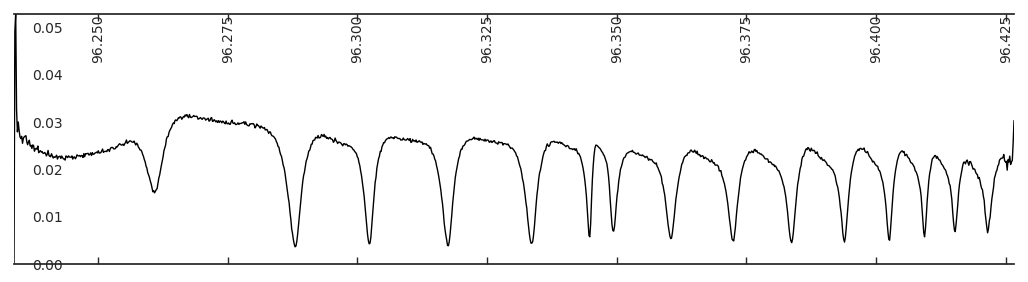

In [18]:
#Profile plot with axes (for meetings)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def make_plot_with_axes(filename, save=True, show=True):
    #Setting up the data arrays and useful values
    cube = RingCube(filename)
    data = cube.img
    minrad = cube.minrad.value
    maxrad = cube.maxrad.value
    
    #Calculating the y-values of the plot (copied from Michael's code)
    ifs = np.nanmedian(data, axis=1)
    ifs = np.nan_to_num(ifs)
    ifs[ifs < 0] = 0
    
    #Setting up the figure for plotting
    fig = plt.figure(facecolor='white', dpi=100)   #facecolor must = 'white' for the plot to show up in Zooniverse
    ax = plt.axes([0,0,1,1])
    #Fixed figure resolution with 100 dpi: (wxh) = (1000x500 pixels)
    fig.set_size_inches(10., 2.5)
    #Removing y-axis/labels and formating x-axis/labels
    ax.tick_params(axis='both',which='major',direction='in',length=5,width=1,labelsize=10,pad=-35,bottom=True,top=True,labeltop=True,labelbottom=False)
    #ax.get_yaxis().set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    #Turns the x-tick labels vertical
    plt.xticks(rotation=90)
    #plt.margins is used to remove the white space on the sides of the image file
    plt.margins(0,0)
    #Plotting the intensity profile of the image produced above
    plt.plot(np.linspace(*cube.extent[2:], data.shape[0]), ifs, color='black', lw=1)
    #Setting this strict x limit is necessary for removing white space in the png file
    plt.xlim([minrad,maxrad])
    #If you want to save the file: Please modify the first part of the string to determine its destination
    #Note: I needed to remove "bbox_inches='tight',pad_inches=0" from plt.savefig to get rid of white margin space
    if save == True:
        plt.savefig('./Axes_On/'+filename+'_plt.png',dpi=100,format='png',frameon=False)
    else:
        pass
    #If you want to display the image in ipython..
    if show == True:
        plt.show()
    else:
        pass
    plt.close()
    return

make_plot_with_axes('N1467344745',save=False)  #soliton
#make_plot_with_axes('N1467345680',save=True)  #soliton
#make_plot_with_axes('N1467351049',save=True)
#make_plot_with_axes('N1560312042',save=True)
#make_plot_with_axes('N1584974162',save=True)
#make_plot_with_axes('N1595337686',save=True)
#make_plot_with_axes('N1595338491',save=True)
#make_plot_with_axes('N1597806864',save=True)
#make_plot_with_axes('N1625958972',save=True)
#make_plot_with_axes('N1654249612',save=True)
#make_plot_with_axes('N1868840683',save=False)  #DONT
#make_plot_with_axes('N1595338008',save=False)  #DONT

In [2]:
#This is the current version of my code to read in information from the data export file
#This needs to be cleaned up and organized greatly
import pandas as pd
import json

# Read in classification CSV and expand JSON fields
classifications = pd.read_csv('10-image-sample-classifications.csv')
classifications['metadata_json'] = [json.loads(q) for q in classifications.metadata]
classifications['annotations_json'] = [json.loads(q) for q in classifications.annotations]
classifications['subject_data_json'] = [json.loads(q) for q in classifications.subject_data]

# Calculate number of markings per classification
# Note: index of annotations_json ("q" here) corresponds to task number (i.e., 0)
classifications['n_markings'] = [ len(q[0]['value']) for q in classifications.annotations_json ]

### Classification Selection / CURRENT SETTING: most recent workflow version
# OPTION 1: Select only classifications from most recent workflow version
iclass = classifications[classifications.workflow_version == classifications['workflow_version'].max()]

# Output markings from classifications in iclass to new list of dictionaries (prep for pandas dataframe)
# Applicable for workflows with marking task as first task, and outputs data for circular markers (x,y,r)
clist=[]
for index, c in iclass.iterrows():
    if c['n_markings'] > 0:
        # Note: index of annotations_json corresponds to task number (i.e., 0)
        for q in c.annotations_json[0]['value']:
            
            cube = RingCube(c.subject_data_json[str(c.subject_ids)]['image1'][:-8])
            radMin = cube.minrad.value
            radMax = cube.maxrad.value
            
            # OPTIONAL EXPANSION: could use if statement here to split marker types
            
            clist.append({'classification_id':c.classification_id, 'user_name':c.user_name,'subject_ids':c.subject_data_json[str(c.subject_ids)]['image1'][:-8], 'radius':(((q['x']/(1000.))*(radMax-radMin)) + radMin)})

# Output list of dictionaries to pandas dataframe and export to CSV.
col_order=['classification_id','user_name','subject_ids','radius']
out=pd.DataFrame(clist)[col_order]
#out.to_csv(markfile_out,index_label='mark_id')
out

,classification_id,user_name,subject_ids,radius
0,149171147,chab5881,N1595338491,132.212318
1,149171786,chab5881,N1467344745,96.344622
2,149171964,chab5881,N1625958972,134.297717
3,149172573,chab5881,N1467345680,125.377792
4,149172573,chab5881,N1467345680,125.447928
5,149189342,michaelaye,N1584974162,136.440427
6,149189342,michaelaye,N1584974162,136.703015
7,149189453,michaelaye,N1467344745,96.344817
8,149189691,michaelaye,N1467345680,125.285091
9,149189691,michaelaye,N1467345680,125.383994


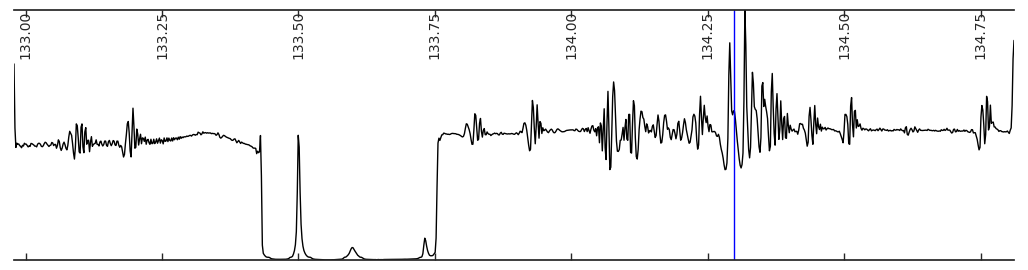

In [116]:
#Plotting image with data export data
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def make_plot_with_data(filename,save=True):
    #Setting up the data arrays and useful values
    cube = RingCube(filename)
    data = cube.img
    minrad = cube.minrad.value
    maxrad = cube.maxrad.value
    
    #Calculating the y-values of the plot (copied from Michael's code)
    ifs = np.nanmedian(data, axis=1)
    ifs = np.nan_to_num(ifs)
    ifs[ifs < 0] = 0
    
    lines = np.array([])
    colors = np.array([])
    for _,rows in out.iterrows():
        if rows['subject_ids'] == filename:
            lines = np.append(lines, rows['radius'])
            
            if rows['user_name'] == 'chab5881':
                colors = np.append(colors, 'blue')
            else:
                colors = np.append(colors, 'green')
        else:
            pass
    #Setting up the figure for plotting
    fig = plt.figure(facecolor='white', dpi=100)   #facecolor must = 'white' for the plot to show up in Zooniverse
    ax = plt.axes([0,0,1,1])
    #Fixed figure resolution with 100 dpi: (wxh) = (1000x500 pixels)
    fig.set_size_inches(10., 2.5)
    #Removing axis and labels
    ax.tick_params(axis='both',which='major',direction='in',length=5,width=1,labelsize=10,pad=-35,bottom=True,top=True,labeltop=True,labelbottom=False)
    ax.get_yaxis().set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(rotation=90)
    plt.margins(0,0)
    #Plotting the intensity profile of the image produced above
    plt.plot(np.linspace(*cube.extent[2:], data.shape[0]), ifs, color='black', lw=1)
    for i in np.arange(lines.size):
        plt.axvline(x=lines[i],lw=1,color = colors[i])
    #Setting this strict x limit is necessary for removing white space in the png file
    plt.xlim([minrad,maxrad])
    if save == True:
        plt.savefig('./dataPlot/'+filename+'_plt.png',dpi=100,format='png',bbox_inches='tight',pad_inches=0,frameon=False)
    else:
        pass
    plt.show()
    plt.close()
    return

#make_plot_with_data('N1467344745')   #soliton
#make_plot_with_data('N1467345680')   #soliton
#make_plot_with_data('N1467351049')
#make_plot_with_data('N1584974162')
#make_plot_with_data('N1595337686')
#make_plot_with_data('N1595338491')
#make_plot_with_data('N1597806864')
#make_plot_with_data('N1625958972')

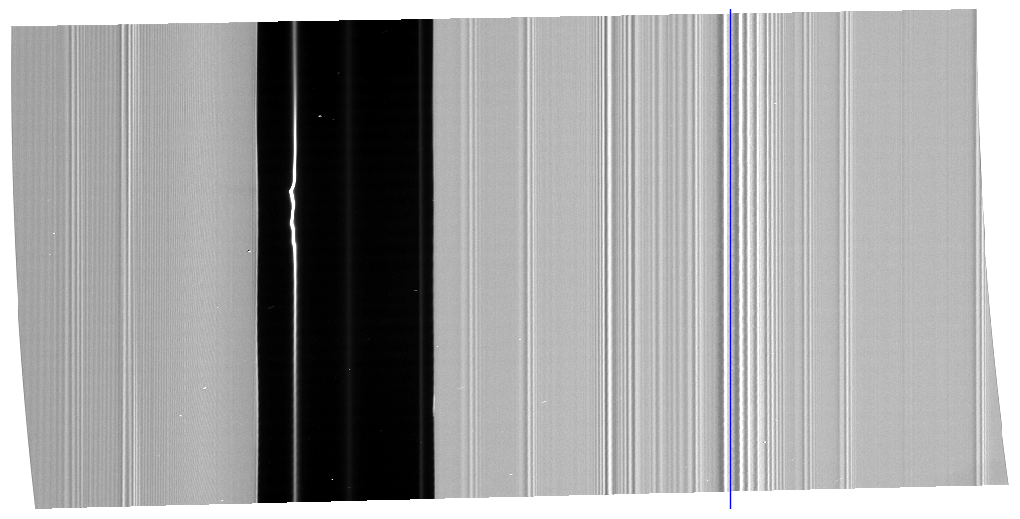

In [134]:
def make_image_with_data(filename,save=True):
    #Setting up the data arrays and useful values
    cube = RingCube(filename)
    data = cube.img
    extent_val = cube.extent
    min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))
    minlon = cube.minlon.value
    maxlon = cube.maxlon.value
    minrad = cube.minrad.value
    maxrad = cube.maxrad.value
    
    lines = np.array([])
    colors = np.array([])
    for _,rows in out.iterrows():
        if rows['subject_ids'] == filename:
            lines = np.append(lines, rows['radius'])
            
            if rows['user_name'] == 'chab5881':
                colors = np.append(colors, 'blue')
            else:
                colors = np.append(colors, 'green')
        else:
            pass
    #Setting up the figure for plotting
    fig = plt.figure(dpi=100, frameon=False)
    ax = plt.axes([0,0,1,1])
    #Fixed figure resolution with 100 dpi: (wxh) = (1000x500 pixels)
    fig.set_size_inches(10., 5.)
    #Removing axis and labels
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('off')
    #Plotting the data array transposed to rotate the image
    #Note: I needed to change the exent parameter after rotating the array
    plt.imshow(np.rot90(data),extent=[minrad,maxrad,minlon,maxlon],cmap='gray',vmin=min_,vmax=max_,interpolation='none',origin='lower',aspect='auto')
    for i in np.arange(lines.size):
        plt.axvline(x=lines[i],lw=1,color = colors[i])
    #Setting these strict x/y limits are necessary for removing white space in the png file
    plt.xlim([minrad,maxrad])
    plt.ylim([minlon,maxlon])
    #If you want to save the file: Please modify the first part of the string to determine its destination
    if save == True:
        plt.savefig('./dataPlot/'+filename+'_img.png',dpi=100,format='png',bbox_inches='tight',pad_inches=0,frameon=False)
    else:
        pass
    plt.show()
    plt.close()
    return

#make_image_with_data('N1467344745')  #soliton
#make_image_with_data('N1467345680')  #soliton
#make_image_with_data('N1467351049')
#make_image_with_data('N1584974162')
#make_image_with_data('N1595337686')
#make_image_with_data('N1595338491')
#make_image_with_data('N1597806864')
#make_image_with_data('N1625958972')